In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("milling_manufacturing.csv")

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# EDA

In [5]:
df.groupby("Type").agg(
    Type_count=('UDI', lambda x: x.count()),  # Count of 'UDI'
    Type_ratio=('UDI', lambda x: x.count() / len(df))  # Ratio of 'UDI' count to total length of DataFrame
)

,Type_count,Type_ratio
Type,,
H,1003,0.1003
L,6000,0.6000
M,2997,0.2997


(array([ 249.,  313.,  873., 1807., 1822.,  824.,  885., 1932., 1114.,
         181.]),
 array([ 7.6 ,  8.05,  8.5 ,  8.95,  9.4 ,  9.85, 10.3 , 10.75, 11.2 ,
        11.65, 12.1 ]),
 <BarContainer object of 10 artists>)

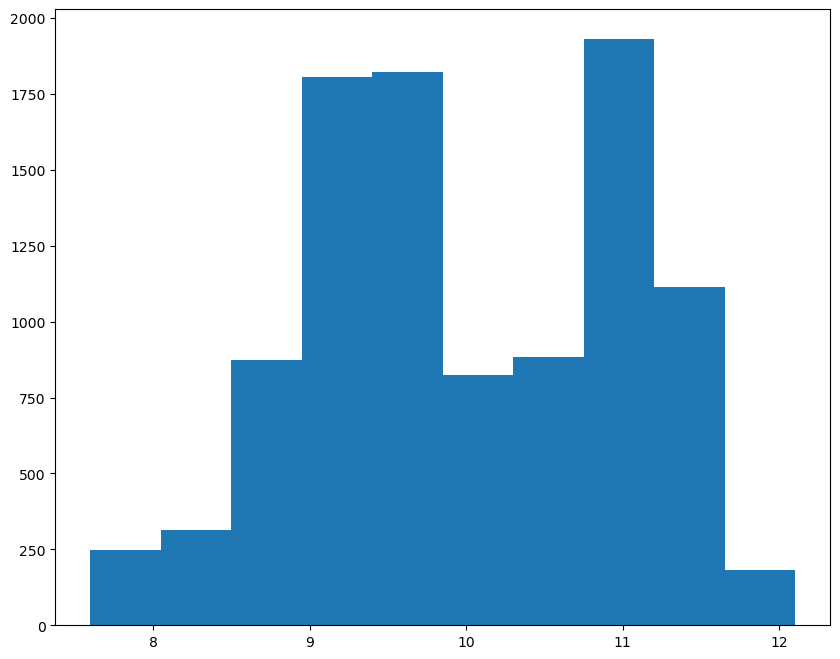

In [6]:
temp_diff = (df["Process temperature [K]"] - df["Air temperature [K]"])
plt.figure(figsize=(10,8))
plt.hist(temp_diff)

In [14]:
df["temp_level"] = pd.qcut(temp_diff, 3)
df["temp_level"].value_counts()


temp_level
(7.598999999999999, 9.4]    3430
(9.4, 10.7]                 3295
(10.7, 12.1]                3275
Name: count, dtype: int64

(array([ 602., 4650., 3227.,  987.,  336.,  102.,   45.,   21.,   22.,
           8.]),
 array([1168. , 1339.8, 1511.6, 1683.4, 1855.2, 2027. , 2198.8, 2370.6,
        2542.4, 2714.2, 2886. ]),
 <BarContainer object of 10 artists>)

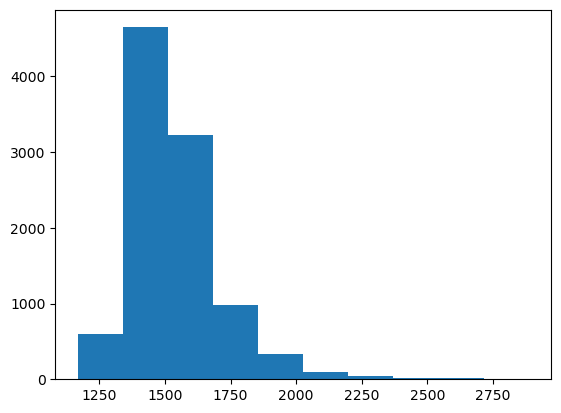

In [58]:
plt.hist(df['Rotational speed [rpm]'])

In [55]:
df["Rotational_level"] = pd.qcut(df['Rotational speed [rpm]'], q=3)
df["Rotational_level"].value_counts()

Rotational_level
(1167.999, 1449.0]    3351
(1449.0, 1568.0]      3331
(1568.0, 2886.0]      3318
Name: count, dtype: int64

(array([  13.,  137.,  614., 1666., 2597., 2697., 1624.,  521.,  112.,
          19.]),
 array([ 3.8 , 11.08, 18.36, 25.64, 32.92, 40.2 , 47.48, 54.76, 62.04,
        69.32, 76.6 ]),
 <BarContainer object of 10 artists>)

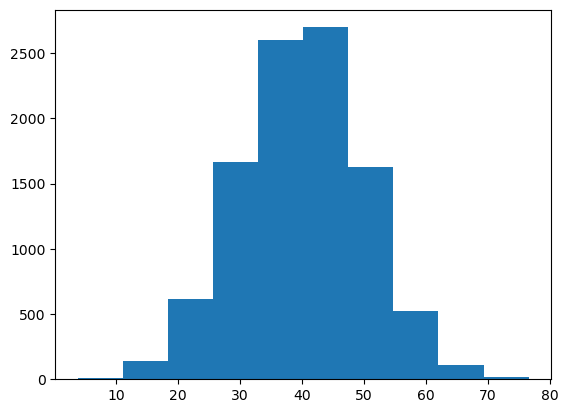

In [59]:
plt.hist(df['Torque [Nm]'])

In [57]:
df["Torque_level"] = pd.qcut(df['Torque [Nm]'], q=3)
df["Torque_level"].value_counts()

Torque_level
(3.799, 35.8]    3369
(35.8, 44.4]     3319
(44.4, 76.6]     3312
Name: count, dtype: int64

In [67]:
df[["TWF","HDF","PWF","OSF"]].apply(pd.Series.value_counts)

,TWF,HDF,PWF,OSF
0,9954,9885,9905,9902
1,46,115,95,98


In [76]:
# Find rows where any of the columns 'a', 'b', or 'c' have a value of 0
condition = (df[["HDF","PWF","OSF"]] != 0).any(axis=1)
df[-condition]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temp_level,Rotational_level,Torque_level
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,"(9.4, 10.7]","(1449.0, 1568.0]","(35.8, 44.4]"
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,"(9.4, 10.7]","(1167.999, 1449.0]","(44.4, 76.6]"
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,"(9.4, 10.7]","(1449.0, 1568.0]","(44.4, 76.6]"
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,"(9.4, 10.7]","(1167.999, 1449.0]","(35.8, 44.4]"
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,"(9.4, 10.7]","(1167.999, 1449.0]","(35.8, 44.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,"(9.4, 10.7]","(1568.0, 2886.0]","(3.799, 35.8]"
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,"(9.4, 10.7]","(1568.0, 2886.0]","(3.799, 35.8]"
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,"(9.4, 10.7]","(1568.0, 2886.0]","(3.799, 35.8]"
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,"(9.4, 10.7]","(1167.999, 1449.0]","(44.4, 76.6]"


In [17]:
16*60*30*3


86400

In [16]:
5000+18000+6000

29000